In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\youss\Downloads\fixed\2019-fordgobike-San Franscisco.csv")
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [3]:
df.shape

(183412, 16)

In [4]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.isnull()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.member_birth_year.mean()


1984.8064368787361

In [9]:
df.member_birth_year.median()

1987.0

In [10]:

df['member_birth_year'].fillna(value=df['member_birth_year'].median(), inplace=True)

In [11]:
df['age']= (2019- df['member_birth_year']).round(0)

In [12]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
age                           0
dtype: int64

In [13]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1987.0,NaN,No,32.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0


In [14]:
df.start_station_id.mode()[0]

58.0

In [15]:
df.member_gender.mode()[0]

'Male'

In [16]:
df['start_station_name'].fillna(value=df['start_station_name'].mode()[0], inplace=True)
df['end_station_name'].fillna(value=df['end_station_name'].mode()[0], inplace=True)
df['start_station_id'].fillna(value=df['start_station_id'].mode()[0], inplace=True)
df['end_station_id'].fillna(value=df['end_station_id'].mode()[0], inplace=True)
df['member_gender'].fillna(value=df['member_gender'].mode()[0], inplace=True)

In [17]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
age                        0
dtype: int64

In [18]:
df.member_gender.value_counts()

Male      138916
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [19]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1987.0,Male,No,32.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183412 non-null  float64
 4   start_station_name       183412 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183412 non-null  float64
 8   end_station_name         183412 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        183412 non-null  float64
 14  memb

In [21]:
df['start_station_id']=df['start_station_id'].apply(str)
df['start_station_name']=df['start_station_name'].apply(str)
df['member_birth_year']=df['member_birth_year'].apply(str)
df['end_station_name']=df['end_station_name'].apply(str)
df['end_station_id']=df['end_station_id'].apply(str)
df['bike_id']=df['bike_id'].apply(str)
df['age']=df['age'].apply(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183412 non-null  object 
 4   start_station_name       183412 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183412 non-null  object 
 8   end_station_name         183412 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  object 
 12  user_type                183412 non-null  object 
 13  member_birth_year        183412 non-null  object 
 14  memb

In [23]:
end_time = pd.to_datetime(df['end_time'])
start_time = pd.to_datetime(df['start_time'])
df['duration_hrs'] = end_time - start_time

In [24]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_hrs
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35,0 days 14:29:45.830000
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1987.0,Male,No,32,0 days 11:48:41.267000
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47,0 days 17:10:54.928000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30,0 days 10:08:10.832000
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45,0 days 00:26:25.525000


In [25]:
df['start_time']=pd.to_datetime(df['start_time'])
df['start_date']= df.start_time.dt.date
df['start_day'] = pd.to_datetime(df['start_time']).dt.day_name()
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour

TRYING TO FIND A RELATION BETWEEN MOST BIKE USED AND STATIONS   

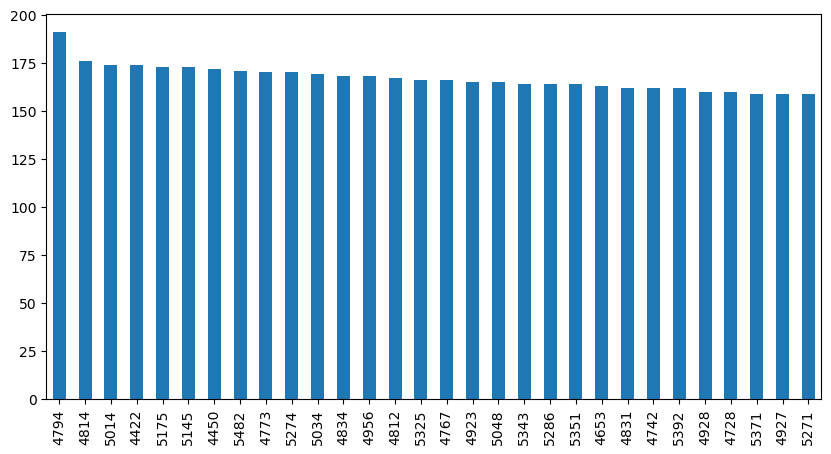

In [26]:
plt.figure(figsize=(10,5))
df['bike_id'].value_counts()[:30].plot(kind='bar');

In [27]:
df_4791= df[df['bike_id']=='4794']
df_4814 = df[df['bike_id']=='4814']
df_5014 = df[df['bike_id']=='5014']

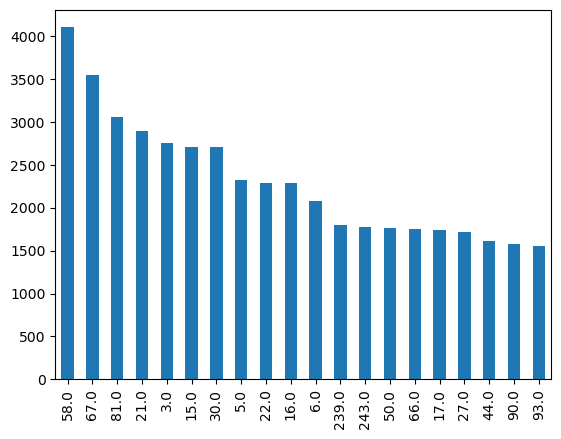

In [28]:
df['start_station_id'].value_counts()[:20].plot(kind='bar');

In [29]:
Station_58= df[df['start_station_id']=='58.0']
Station_67= df[df['start_station_id']=='67.0']

In [30]:
Station_58

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_hrs,start_date,start_day,start_hour
38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.7920,58.0,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,...,5938,Subscriber,1992.0,Female,No,27,0 days 00:17:46.653000,2019-02-28,Thursday,23
54,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.9550,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,...,5407,Subscriber,1990.0,Female,No,29,0 days 00:06:41.484000,2019-02-28,Thursday,23
110,371,2019-02-28 23:01:15.077,2019-02-28 23:07:26.4590,58.0,Market St at 10th St,37.776619,-122.417385,98.0,Valencia St at 16th St,37.765052,...,6435,Subscriber,1994.0,Male,No,25,0 days 00:06:11.382000,2019-02-28,Thursday,23
114,376,2019-02-28 23:00:05.223,2019-02-28 23:06:21.5150,58.0,Market St at 10th St,37.776619,-122.417385,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,5731,Subscriber,1982.0,Male,No,37,0 days 00:06:16.292000,2019-02-28,Thursday,23
190,515,2019-02-28 22:28:11.347,2019-02-28 22:36:46.3890,58.0,Market St at 10th St,37.776619,-122.417385,321.0,5th St at Folsom,37.780146,...,5234,Subscriber,1981.0,Other,No,38,0 days 00:08:35.042000,2019-02-28,Thursday,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183362,899,2019-02-01 01:08:39.015,2019-02-01 01:23:38.7980,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,...,2033,Subscriber,1999.0,Male,No,20,0 days 00:14:59.783000,2019-02-01,Friday,1
183364,892,2019-02-01 01:08:43.731,2019-02-01 01:23:35.7630,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,...,3392,Subscriber,2000.0,Male,No,19,0 days 00:14:52.032000,2019-02-01,Friday,1
183365,932,2019-02-01 01:07:51.908,2019-02-01 01:23:24.3700,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,...,4962,Subscriber,2000.0,Female,No,19,0 days 00:15:32.462000,2019-02-01,Friday,1
183366,932,2019-02-01 01:07:49.971,2019-02-01 01:23:22.5280,58.0,Market St at 10th St,37.776619,-122.417385,133.0,Valencia St at 22nd St,37.755213,...,5382,Subscriber,2000.0,Female,No,19,0 days 00:15:32.557000,2019-02-01,Friday,1


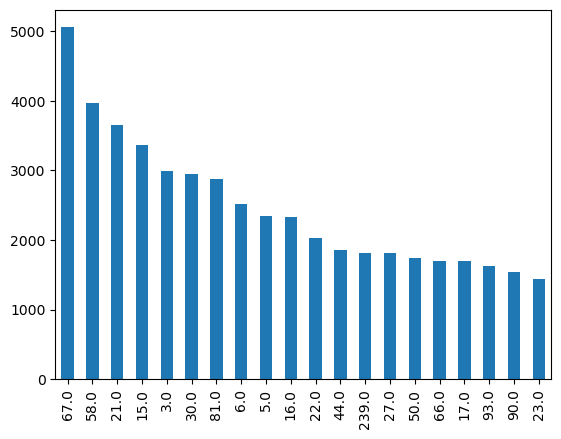

In [31]:
df['end_station_id'].value_counts()[:20].plot(kind='bar');

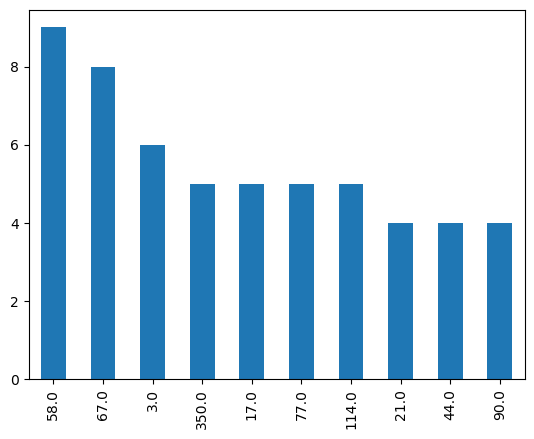

In [32]:

df_4791.start_station_id.value_counts()[:10].plot(kind='bar');

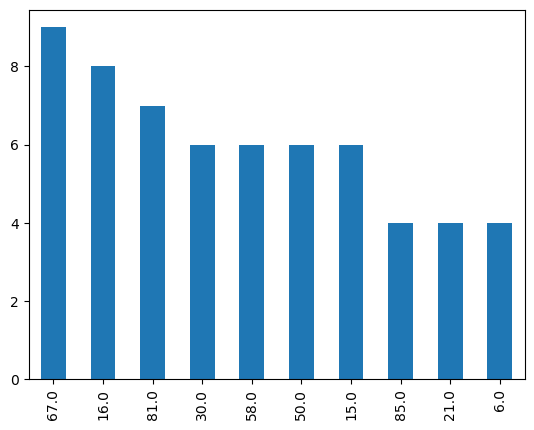

In [33]:
df_4814.start_station_id.value_counts()[:10].plot(kind='bar');

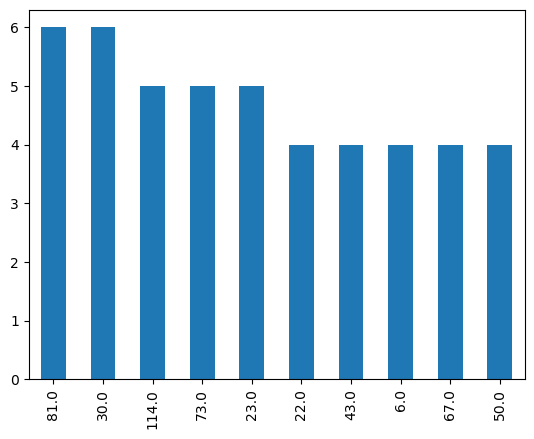

In [34]:
df_5014.start_station_id.value_counts()[:10].plot(kind='bar');

In [35]:
df_4791.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_hrs,start_date,start_day,start_hour
884,795,2019-02-28 20:05:05.390,2019-02-28 20:18:20.8330,77.0,11th St at Natoma St,37.773507,-122.416040,93.0,4th St at Mission Bay Blvd S,37.770407,...,4794,Subscriber,1989.0,Male,No,30,0 days 00:13:15.443000,2019-02-28,Thursday,20
1166,321,2019-02-28 19:37:52.545,2019-02-28 19:43:14.0570,350.0,8th St at Brannan St,37.771431,-122.405787,77.0,11th St at Natoma St,37.773507,...,4794,Subscriber,1993.0,Male,No,26,0 days 00:05:21.512000,2019-02-28,Thursday,19
1234,665,2019-02-28 19:25:05.007,2019-02-28 19:36:10.1290,27.0,Beale St at Harrison St,37.788059,-122.391865,350.0,8th St at Brannan St,37.771431,...,4794,Subscriber,1994.0,Male,No,25,0 days 00:11:05.122000,2019-02-28,Thursday,19
1372,294,2019-02-28 19:18:13.785,2019-02-28 19:23:08.2290,81.0,Berry St at 4th St,37.775880,-122.393170,27.0,Beale St at Harrison St,37.788059,...,4794,Subscriber,1992.0,Male,No,27,0 days 00:04:54.444000,2019-02-28,Thursday,19
1749,445,2019-02-28 18:45:17.244,2019-02-28 18:52:43.1990,16.0,Steuart St at Market St,37.794130,-122.394430,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,4794,Subscriber,1984.0,Male,No,35,0 days 00:07:25.955000,2019-02-28,Thursday,18
1927,763,2019-02-28 18:28:39.858,2019-02-28 18:41:23.2310,104.0,4th St at 16th St,37.767045,-122.390833,16.0,Steuart St at Market St,37.794130,...,4794,Subscriber,1985.0,Male,No,34,0 days 00:12:43.373000,2019-02-28,Thursday,18
8311,627,2019-02-28 08:25:50.337,2019-02-28 08:36:18.2410,24.0,Spear St at Folsom St,37.789677,-122.390428,104.0,4th St at 16th St,37.767045,...,4794,Subscriber,1986.0,Male,No,33,0 days 00:10:27.904000,2019-02-28,Thursday,8
9037,877,2019-02-28 07:42:36.692,2019-02-28 07:57:14.0000,355.0,23rd St at Tennessee St,37.755367,-122.388795,24.0,Spear St at Folsom St,37.789677,...,4794,Subscriber,1996.0,Female,No,23,0 days 00:14:37.308000,2019-02-28,Thursday,7
11517,561,2019-02-27 18:29:43.688,2019-02-27 18:39:05.1380,364.0,China Basin St at 3rd St,37.772000,-122.389970,355.0,23rd St at Tennessee St,37.755367,...,4794,Subscriber,1980.0,Male,No,39,0 days 00:09:21.450000,2019-02-27,Wednesday,18
11901,711,2019-02-27 18:04:35.903,2019-02-27 18:16:27.3160,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,364.0,China Basin St at 3rd St,37.772000,...,4794,Subscriber,1980.0,Male,No,39,0 days 00:11:51.413000,2019-02-27,Wednesday,18


In [36]:
dif=df[start_time]-df[end_time]

KeyError: "None of [DatetimeIndex(['2019-02-28 17:32:10.145000', '2019-02-28 18:53:21.789000',\n               '2019-02-28 12:13:13.218000', '2019-02-28 17:54:26.010000',\n               '2019-02-28 23:54:18.549000', '2019-02-28 23:49:58.632000',\n               '2019-02-28 23:55:35.104000', '2019-02-28 23:41:06.766000',\n               '2019-02-28 23:41:48.790000', '2019-02-28 23:49:47.699000',\n               ...\n               '2019-02-01 00:17:32.258000', '2019-02-01 00:15:12.067000',\n               '2019-02-01 00:12:50.554000', '2019-02-01 00:14:49.874000',\n               '2019-02-01 00:04:40.616000', '2019-02-01 00:04:49.724000',\n               '2019-02-01 00:05:34.744000', '2019-02-01 00:06:05.549000',\n               '2019-02-01 00:05:34.360000', '2019-02-01 00:00:20.636000'],\n              dtype='datetime64[ns]', length=183412, freq=None)] are in the [columns]"

In [ ]:
# (df['start_time']).astype(Datetime)-(df['end_time'].astype(Datetime)).shift()
df['end_time'] = pd.to_datetime(df['end_time'])
df['end_time'].dtype()



TypeError: 'numpy.dtype[datetime64]' object is not callable

In [ ]:
df['end_time'] = pd.to_datetime(df['end_time'])
df['end_time'].dtype()


TypeError: 'numpy.dtype[datetime64]' object is not callable

In [ ]:
df_4791['end_time'] = pd.to_datetime(df['end_time'])
df_4791['end_time'].dtype()


C:\Users\youss\AppData\Local\Temp\ipykernel_13616\3814128763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4791['end_time'] = pd.to_datetime(df['end_time'])


TypeError: 'numpy.dtype[datetime64]' object is not callable

In [ ]:
diff= (df['end_time'])-df['start_time'].shift()

TypeError: cannot subtract DatetimeArray from ndarray

In [37]:
def getDif(end , start):
    return end-start.shift()

In [38]:
df_4791['end_time'] = pd.to_datetime(df_4791['end_time'])
df_4791['end_time'].dtype()

C:\Users\youss\AppData\Local\Temp\ipykernel_72\1141559578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4791['end_time'] = pd.to_datetime(df_4791['end_time'])


TypeError: 'numpy.dtype[datetime64]' object is not callable

In [39]:
df_4791

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_hrs,start_date,start_day,start_hour
884,795,2019-02-28 20:05:05.390,2019-02-28 20:18:20.833,77.0,11th St at Natoma St,37.773507,-122.416040,93.0,4th St at Mission Bay Blvd S,37.770407,...,4794,Subscriber,1989.0,Male,No,30,0 days 00:13:15.443000,2019-02-28,Thursday,20
1166,321,2019-02-28 19:37:52.545,2019-02-28 19:43:14.057,350.0,8th St at Brannan St,37.771431,-122.405787,77.0,11th St at Natoma St,37.773507,...,4794,Subscriber,1993.0,Male,No,26,0 days 00:05:21.512000,2019-02-28,Thursday,19
1234,665,2019-02-28 19:25:05.007,2019-02-28 19:36:10.129,27.0,Beale St at Harrison St,37.788059,-122.391865,350.0,8th St at Brannan St,37.771431,...,4794,Subscriber,1994.0,Male,No,25,0 days 00:11:05.122000,2019-02-28,Thursday,19
1372,294,2019-02-28 19:18:13.785,2019-02-28 19:23:08.229,81.0,Berry St at 4th St,37.775880,-122.393170,27.0,Beale St at Harrison St,37.788059,...,4794,Subscriber,1992.0,Male,No,27,0 days 00:04:54.444000,2019-02-28,Thursday,19
1749,445,2019-02-28 18:45:17.244,2019-02-28 18:52:43.199,16.0,Steuart St at Market St,37.794130,-122.394430,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,4794,Subscriber,1984.0,Male,No,35,0 days 00:07:25.955000,2019-02-28,Thursday,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182000,199,2019-02-01 08:45:38.507,2019-02-01 08:48:58.179,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,27.0,Beale St at Harrison St,37.788059,...,4794,Customer,1987.0,Male,No,32,0 days 00:03:19.672000,2019-02-01,Friday,8
182539,653,2019-02-01 08:07:07.966,2019-02-01 08:18:01.579,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,...,4794,Subscriber,1967.0,Male,No,52,0 days 00:10:53.613000,2019-02-01,Friday,8
182768,222,2019-02-01 07:54:06.888,2019-02-01 07:57:49.433,321.0,5th St at Folsom,37.780146,-122.403071,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,4794,Subscriber,1988.0,Male,No,31,0 days 00:03:42.545000,2019-02-01,Friday,7
182837,235,2019-02-01 07:47:30.652,2019-02-01 07:51:25.776,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,321.0,5th St at Folsom,37.780146,...,4794,Subscriber,1992.0,Female,No,27,0 days 00:03:55.124000,2019-02-01,Friday,7


In [40]:
mar= getDif(df_4791['end_time'],df_4791['start_time'])

In [41]:
mar

884                           NaT
1166     -1 days +23:38:08.667000
1234     -1 days +23:58:17.584000
1372     -1 days +23:58:03.222000
1749     -1 days +23:34:29.414000
                   ...           
182000   -1 days +23:57:58.431000
182539   -1 days +23:32:23.072000
182768   -1 days +23:50:41.467000
182837   -1 days +23:57:18.888000
182890   -1 days +23:57:13.964000
Length: 191, dtype: timedelta64[ns]

In [42]:
import time


test = time.ctime(131133300)
test

'Tue Feb 26 19:55:00 1974'

In [43]:
df_4791

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_hrs,start_date,start_day,start_hour
884,795,2019-02-28 20:05:05.390,2019-02-28 20:18:20.833,77.0,11th St at Natoma St,37.773507,-122.416040,93.0,4th St at Mission Bay Blvd S,37.770407,...,4794,Subscriber,1989.0,Male,No,30,0 days 00:13:15.443000,2019-02-28,Thursday,20
1166,321,2019-02-28 19:37:52.545,2019-02-28 19:43:14.057,350.0,8th St at Brannan St,37.771431,-122.405787,77.0,11th St at Natoma St,37.773507,...,4794,Subscriber,1993.0,Male,No,26,0 days 00:05:21.512000,2019-02-28,Thursday,19
1234,665,2019-02-28 19:25:05.007,2019-02-28 19:36:10.129,27.0,Beale St at Harrison St,37.788059,-122.391865,350.0,8th St at Brannan St,37.771431,...,4794,Subscriber,1994.0,Male,No,25,0 days 00:11:05.122000,2019-02-28,Thursday,19
1372,294,2019-02-28 19:18:13.785,2019-02-28 19:23:08.229,81.0,Berry St at 4th St,37.775880,-122.393170,27.0,Beale St at Harrison St,37.788059,...,4794,Subscriber,1992.0,Male,No,27,0 days 00:04:54.444000,2019-02-28,Thursday,19
1749,445,2019-02-28 18:45:17.244,2019-02-28 18:52:43.199,16.0,Steuart St at Market St,37.794130,-122.394430,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,4794,Subscriber,1984.0,Male,No,35,0 days 00:07:25.955000,2019-02-28,Thursday,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182000,199,2019-02-01 08:45:38.507,2019-02-01 08:48:58.179,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,27.0,Beale St at Harrison St,37.788059,...,4794,Customer,1987.0,Male,No,32,0 days 00:03:19.672000,2019-02-01,Friday,8
182539,653,2019-02-01 08:07:07.966,2019-02-01 08:18:01.579,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,...,4794,Subscriber,1967.0,Male,No,52,0 days 00:10:53.613000,2019-02-01,Friday,8
182768,222,2019-02-01 07:54:06.888,2019-02-01 07:57:49.433,321.0,5th St at Folsom,37.780146,-122.403071,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,4794,Subscriber,1988.0,Male,No,31,0 days 00:03:42.545000,2019-02-01,Friday,7
182837,235,2019-02-01 07:47:30.652,2019-02-01 07:51:25.776,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,321.0,5th St at Folsom,37.780146,...,4794,Subscriber,1992.0,Female,No,27,0 days 00:03:55.124000,2019-02-01,Friday,7


In [44]:
mar

884                           NaT
1166     -1 days +23:38:08.667000
1234     -1 days +23:58:17.584000
1372     -1 days +23:58:03.222000
1749     -1 days +23:34:29.414000
                   ...           
182000   -1 days +23:57:58.431000
182539   -1 days +23:32:23.072000
182768   -1 days +23:50:41.467000
182837   -1 days +23:57:18.888000
182890   -1 days +23:57:13.964000
Length: 191, dtype: timedelta64[ns]

In [45]:
df['bike_id']

0         4902
1         2535
2         5905
3         6638
4         4898
          ... 
183407    4832
183408    4960
183409    3824
183410    5095
183411    1057
Name: bike_id, Length: 183412, dtype: object

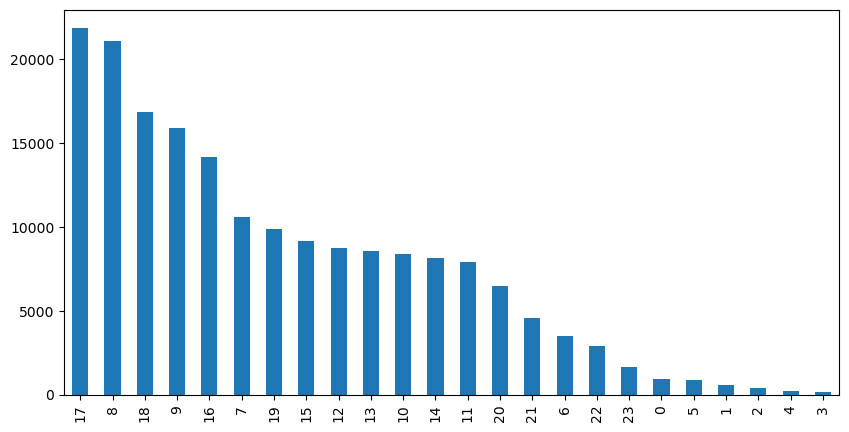

In [47]:
plt.figure(figsize=(10,5))
df['start_hour'].value_counts()[:30].plot(kind='bar');

In [48]:
df.columns


Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'duration_hrs', 'start_date', 'start_day', 'start_hour'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration_sec             183412 non-null  int64          
 1   start_time               183412 non-null  datetime64[ns] 
 2   end_time                 183412 non-null  object         
 3   start_station_id         183412 non-null  object         
 4   start_station_name       183412 non-null  object         
 5   start_station_latitude   183412 non-null  float64        
 6   start_station_longitude  183412 non-null  float64        
 7   end_station_id           183412 non-null  object         
 8   end_station_name         183412 non-null  object         
 9   end_station_latitude     183412 non-null  float64        
 10  end_station_longitude    183412 non-null  float64        
 11  bike_id                  183412 non-null  object         
 12  us

Will Try to Know Bikes with the longest waiting time for better relocation

In [51]:
bike_id = 4791
bike_df = df[df['bike_id'] == bike_id]

# Print 
for i, row in bike_df.iterrows():
    start_station = row['start_station_id']
    end_station = row['end_station_id']
    print(f"Trip {i}: From {start_station} to {end_station}")

In [ ]:
# Sort the data by bike_id and start_time
df.sort_values(by=['bike_id', 'start_time'], inplace=True)

# Create a new column for the time between rides
df['time_between_rides'] = df['start_time'].shift(-1) - df['start_time']


bike_times = df.groupby('bike_id')['time_between_rides'].mean()

# Print 
for bike_id, time in bike_times.items():
    print(f"Bike {bike_id} had an average time between rides of {time}")

Bike 1000 had an average time between rides of -1 days +20:35:18.715300
Bike 1001 had an average time between rides of -1 days +21:16:41.582300
Bike 1002 had an average time between rides of 0 days 00:16:14.738428571
Bike 1003 had an average time between rides of 0 days 02:20:49.831032258
Bike 1004 had an average time between rides of -1 days +21:23:40.687241380
Bike 1005 had an average time between rides of 0 days 00:05:13.323090909
Bike 1006 had an average time between rides of 0 days 03:24:31.870000
Bike 1007 had an average time between rides of 0 days 00:33:29.478642857
Bike 1009 had an average time between rides of -1 days +22:43:40.751500
Bike 1010 had an average time between rides of 0 days 07:49:55.964840
Bike 1011 had an average time between rides of -9 days +18:47:39.184000
Bike 1012 had an average time between rides of -1 days +23:58:37.099322581
Bike 1013 had an average time between rides of 0 days 00:00:23.652692307
Bike 1014 had an average time between rides of 0 days 00:

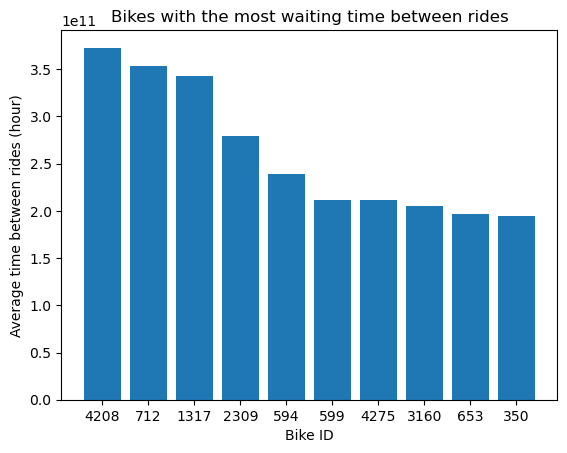

In [52]:
# Sort the data by bike_id and start_time
df.sort_values(by=['bike_id', 'start_time'], inplace=True)

# Create a new column for the time between rides
df['time_between_rides'] = df['start_time'].shift(-1) - df['start_time']

# Group the data by bike_id and compute the average time between rides, /3600 to make it per hour
bike_times = df.groupby('bike_id')['time_between_rides'].mean()/3600

# Sort the bike times in descending order
bike_times.sort_values(ascending=False, inplace=True)

# Select the top 10 bikes
top_bikes = bike_times.head(10)

# Create a bar chart of the top bikes
plt.bar(top_bikes.index, top_bikes.values)
plt.xlabel('Bike ID')
plt.ylabel('Average time between rides (hour)')
plt.title('Bikes with the most waiting time between rides')
plt.show()

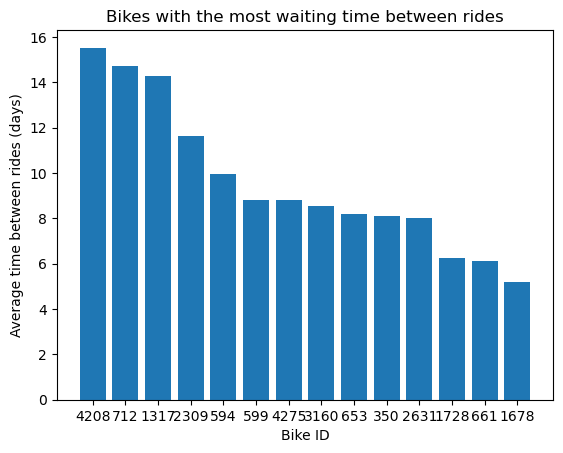

In [54]:
df.sort_values(by=['bike_id', 'start_time'], inplace=True)

df['time_between_rides'] = df['start_time'].shift(-1) - df['start_time']

# Group the data by bike_id and compute the average time between rides
bike_times = df.groupby('bike_id')['time_between_rides'].mean()

# Convert the average time between rides to days
bike_times_days = bike_times / pd.Timedelta(days=1)

# Sort the bike times in descending order
bike_times_days.sort_values(ascending=False, inplace=True)

# Select the top  bikes
top_bikes = bike_times_days.head(14)

# Create a bar chart of the top bikes
plt.bar(top_bikes.index, top_bikes.values)
plt.xlabel('Bike ID')
plt.ylabel('Average time between rides (days)')
plt.title('Bikes with the most waiting time between rides')
plt.show()

Trying to see bikes wwith least waiting time, but we have negative values because more than a trip a day cases

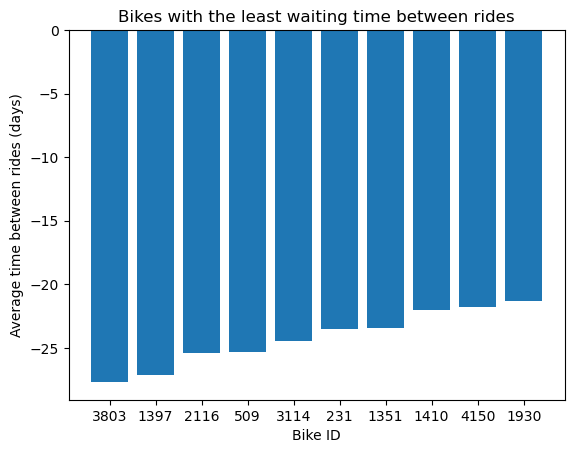

In [ ]:
# Sort the data by bike_id and start_time
df.sort_values(by=['bike_id', 'start_time'], inplace=True)

# Create a new column for the time between rides
df['time_between_rides'] = df['start_time'].shift(-1) - df['start_time']

# Group the data by bike_id and compute the average time between rides
bike_times = df.groupby('bike_id')['time_between_rides'].mean()

# Convert the average time between rides to days
bike_times_days = bike_times / pd.Timedelta(days=1)

# Sort the bike times in ascending order
bike_times_days.sort_values(ascending=True, inplace=True)

# Select the top 10 bikes
top_bikes = bike_times_days.head(10)

# Create a bar chart of the top bikes
plt.bar(top_bikes.index, top_bikes.values)
plt.xlabel('Bike ID')
plt.ylabel('Average time between rides (days)')
plt.title('Bikes with the least waiting time between rides')
plt.show()

will try to count the number of rides per day for each day

In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])

# Create a new column for the date of the ride
df['ride_date'] = df['start_time'].dt.date

# Group the data by bike_id and ride_date and count the number of rides
rides_per_day = df.groupby(['bike_id', 'ride_date']).size()

# Print the number of rides per day for each bike
for (bike_id, ride_date), count in rides_per_day.items():
    print(f"Bike {bike_id} had {count} rides on {ride_date}")

Bike 1000 had 1 rides on 2019-02-03
Bike 1000 had 2 rides on 2019-02-06
Bike 1000 had 1 rides on 2019-02-07
Bike 1000 had 1 rides on 2019-02-08
Bike 1000 had 3 rides on 2019-02-14
Bike 1000 had 2 rides on 2019-02-15
Bike 1001 had 4 rides on 2019-02-02
Bike 1001 had 1 rides on 2019-02-04
Bike 1001 had 1 rides on 2019-02-05
Bike 1001 had 1 rides on 2019-02-08
Bike 1001 had 2 rides on 2019-02-11
Bike 1001 had 1 rides on 2019-02-27
Bike 1002 had 1 rides on 2019-02-01
Bike 1002 had 1 rides on 2019-02-03
Bike 1002 had 2 rides on 2019-02-04
Bike 1002 had 2 rides on 2019-02-05
Bike 1002 had 1 rides on 2019-02-15
Bike 1003 had 2 rides on 2019-02-01
Bike 1003 had 4 rides on 2019-02-05
Bike 1003 had 4 rides on 2019-02-07
Bike 1003 had 2 rides on 2019-02-08
Bike 1003 had 4 rides on 2019-02-11
Bike 1003 had 2 rides on 2019-02-12
Bike 1003 had 1 rides on 2019-02-14
Bike 1003 had 2 rides on 2019-02-15
Bike 1003 had 2 rides on 2019-02-16
Bike 1003 had 1 rides on 2019-02-19
Bike 1003 had 1 rides on 201

In [56]:
# Group the data by start_station_name and count the number of rides
rides_per_station = df.groupby('start_station_name').size()

# Sort the rides in descending order and select the top 10 stations
top_stations = rides_per_station.sort_values(ascending=False).head(10)

# Print the top stations
print(top_stations)


start_station_name
Market St at 10th St                                         4101
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
dtype: int64


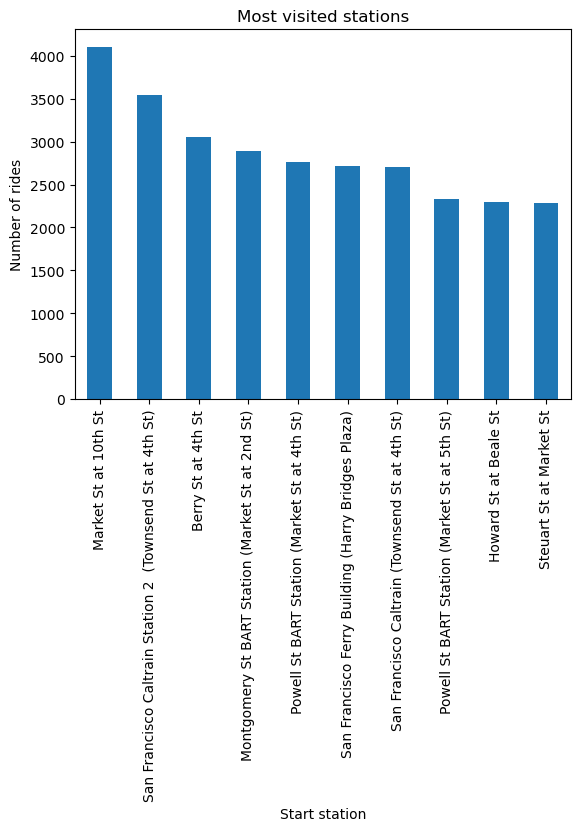

In [ ]:
# Group the data by start_station_name and count the number of rides
rides_per_station = df.groupby('start_station_name').size()

# Sort the rides in descending order and select the top 10 stations
top_stations = rides_per_station.sort_values(ascending=False).head(10)

# Create a bar chart of the top stations
top_stations.plot.bar()
plt.xlabel('Start station')
plt.ylabel('Number of rides')
plt.title('Most visited stations')
plt.show()

In [57]:
# Convert the start_time and end_time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Create a new column for the duration of each ride
df['duration'] = df['end_time'] - df['start_time']

# Group the data by start_station_name and sum the duration of all rides
total_duration_per_station = df.groupby('start_station_name')['duration'].sum()

# Sort the duration in descending order and select the top 10 stations
top_stations = total_duration_per_station.sort_values(ascending=False).head(10)

# Print the top stations
print(top_stations)

start_station_name
Market St at 10th St                                        31 days 18:08:47.212000
San Francisco Ferry Building (Harry Bridges Plaza)          30 days 01:09:51.223000
Powell St BART Station (Market St at 4th St)                27 days 19:20:47.041000
The Embarcadero at Sansome St                               26 days 04:57:01.176000
San Francisco Caltrain Station 2  (Townsend St at 4th St)   25 days 19:38:43.247000
Montgomery St BART Station (Market St at 2nd St)            24 days 15:52:48.840000
Powell St BART Station (Market St at 5th St)                24 days 14:27:59.350000
Berry St at 4th St                                          24 days 09:08:44.234000
San Francisco Caltrain (Townsend St at 4th St)              22 days 04:52:35.332000
Fell St at Stanyan St                                       19 days 06:09:01.851000
Name: duration, dtype: timedelta64[ns]


Try to see average ride for each gender

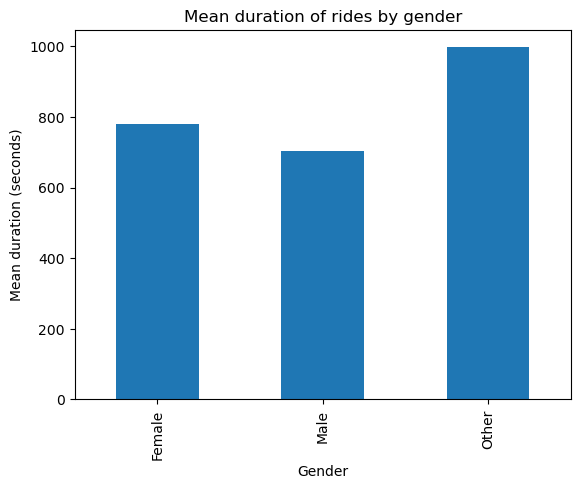

In [ ]:
# Group the data by member_gender and compute the mean duration of all rides
mean_duration_per_gender = df.groupby('member_gender')['duration_sec'].mean()

# Create a bar chart of the mean duration of rides by gender
mean_duration_per_gender.plot.bar()
plt.xlabel('Gender')
plt.ylabel('Mean duration (seconds)')
plt.title('Mean duration of rides by gender')
plt.show()

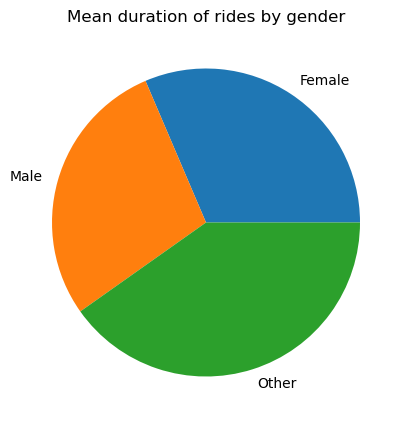

In [ ]:

# Group the data by member_gender and compute the mean duration of all rides
mean_duration_per_gender = df.groupby('member_gender')['duration_sec'].mean()

# Create a pie chart of the mean duration of rides by gender
mean_duration_per_gender.plot.pie(figsize=(5, 5))
plt.title('Mean duration of rides by gender')
plt.ylabel('')
plt.show()

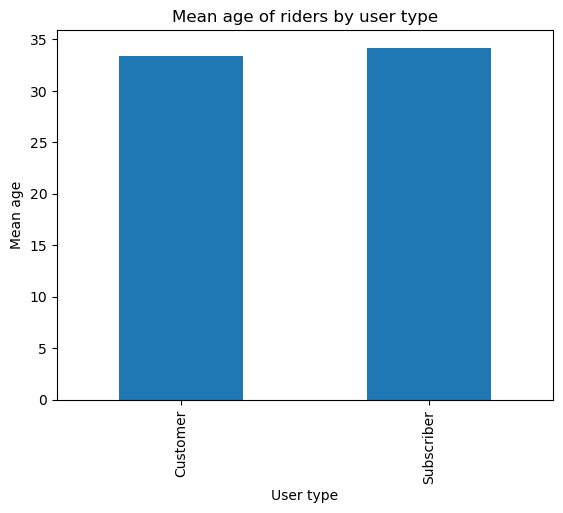

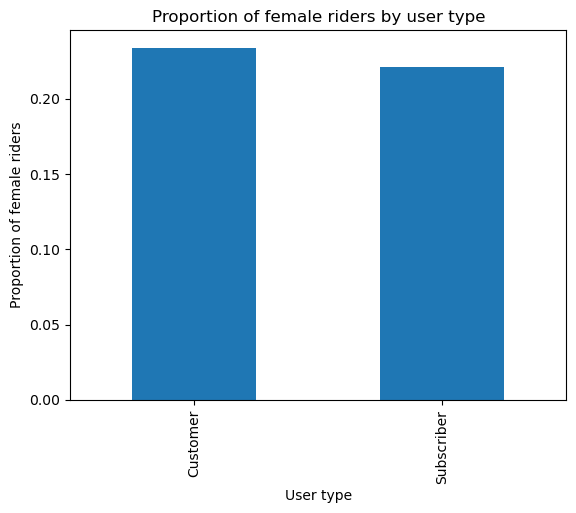

In [60]:
mean_age_per_user_type = df.groupby('user_type')['age'].mean()

# Group the data by member gender and compute the proportion of female riders in each group
proportion_female_per_user_type = df.groupby('user_type')['member_gender'].apply(lambda x: (x == 'Female').mean())

# Create a bar chart of the mean age of riders by user type
mean_age_per_user_type.plot.bar()
plt.xlabel('User type')
plt.ylabel('Mean age')
plt.title('Mean age of riders by user type')
plt.show()

# Create a bar chart of the proportion of female riders by user type
proportion_female_per_user_type.plot.bar()
plt.xlabel('User type')
plt.ylabel('Proportion of female riders')
plt.title('Proportion of female riders by user type')
plt.show()